In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [2]:
edu=pd.read_csv('../states_all.csv')

In [40]:
edu2=edu.copy()
columns=["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]
for col in columns:
     edu2[col] = edu2.groupby('STATE')[col].transform(lambda x: x.interpolate(limit_direction = 'both'))
edu2.dropna(inplace=True)

In [95]:
edu2.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,winsorize GRADES_12_G,winsorize GRADES_1_8_G,winsorize GRADES_9_12_G,winsorize GRADES_ALL_G,winsorize AVG_MATH_4_SCORE,winsorize AVG_MATH_8_SCORE,winsorize AVG_READING_4_SCORE,winsorize AVG_READING_8_SCORE,ortfark_4,ortfark_8
2,1992_ARIZONA,ARIZONA,1992,676297.000,3258079.000,297888.000,1369815.000,1590376.000,3401580.000,1435908.000,...,37410.000,437127.000,175210.000,614881.000,215.254,265.366,206.213,262.170,-9.041,-3.196
3,1992_ARKANSAS,ARKANSAS,1992,311432.000,1711959.000,178571.000,958785.000,574603.000,1743022.000,964323.000,...,27651.000,281338.000,123113.000,405259.000,210.206,256.312,208.634,264.620,-1.572,8.308
5,1992_COLORADO,COLORADO,1992,539538.000,3185173.000,163253.000,1307986.000,1713934.000,3264826.000,1642466.000,...,34533.000,394904.000,160299.000,562613.000,221.023,272.398,213.481,266.420,-7.543,-5.979
6,1992_CONNECTICUT,CONNECTICUT,1992,471918.000,3834302.000,143542.000,1342539.000,2348221.000,3721338.000,2148041.000,...,28366.000,304284.000,126917.000,436932.000,226.798,273.739,222.418,264.714,-4.381,-9.025
7,1992_DELAWARE,DELAWARE,1992,104355.000,645233.000,45945.000,420942.000,178346.000,638784.000,372722.000,...,6129.000,67495.000,28338.000,96296.000,217.900,262.869,206.389,261.578,-11.511,-1.291


In [42]:
edu2.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
2,1992_ARIZONA,ARIZONA,1992,676297.000,3258079.000,297888.000,1369815.000,1590376.000,3401580.000,1435908.000,...,55433.000,49081.000,37410.000,437127.000,175210.000,614881.000,215.254,265.366,206.213,262.170
3,1992_ARKANSAS,ARKANSAS,1992,311432.000,1711959.000,178571.000,958785.000,574603.000,1743022.000,964323.000,...,34632.000,36011.000,27651.000,281338.000,123113.000,405259.000,210.206,256.312,208.634,264.620
5,1992_COLORADO,COLORADO,1992,539538.000,3185173.000,163253.000,1307986.000,1713934.000,3264826.000,1642466.000,...,50648.000,45025.000,34533.000,394904.000,160299.000,562613.000,221.023,272.398,213.481,266.420
6,1992_CONNECTICUT,CONNECTICUT,1992,471918.000,3834302.000,143542.000,1342539.000,2348221.000,3721338.000,2148041.000,...,38058.000,33691.000,28366.000,304284.000,126917.000,436932.000,226.798,273.739,222.418,264.714
7,1992_DELAWARE,DELAWARE,1992,104355.000,645233.000,45945.000,420942.000,178346.000,638784.000,372722.000,...,8272.000,8012.000,6129.000,67495.000,28338.000,96296.000,217.900,262.869,206.389,261.578


In [79]:
edu2.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,winsorize GRADES_4_G,winsorize GRADES_8_G,winsorize GRADES_12_G,winsorize GRADES_1_8_G,winsorize GRADES_9_12_G,winsorize GRADES_ALL_G,winsorize AVG_MATH_4_SCORE,winsorize AVG_MATH_8_SCORE,winsorize AVG_READING_4_SCORE,winsorize AVG_READING_8_SCORE
count,474.000,474.000,474.000,474.000,474.000,474.000,474.000,474.000,474.000,474.000,...,474.000,474.000,474.000,474.000,474.000,474.000,474.000,474.000,474.000,474.000
mean,2008.306,937540.017,10686484.308,945489.787,4951213.734,4789780.770,10768333.454,5581537.563,3150705.551,486911.759,...,57908.437,59323.053,53293.226,467905.036,233333.097,714560.582,236.286,279.171,219.025,263.508
std,6.097,1116716.656,13509959.955,1323975.904,6377841.210,6301760.568,13684809.537,7223257.085,3820803.998,598695.226,...,42542.224,44962.138,41242.113,346200.828,179179.297,528676.695,8.830,9.228,7.303,6.460
min,1992.000,44179.000,645233.000,41007.000,0.000,28531.000,638784.000,318260.000,194915.000,21910.000,...,3423.000,2860.000,2188.000,26762.000,9970.000,36823.000,187.135,232.832,178.558,236.379
25%,2005.000,275327.750,2692582.500,255225.250,1420027.500,943254.750,2632913.000,1406719.500,833569.750,127247.250,...,20433.500,20792.000,18503.250,165864.250,81630.500,259282.000,232.063,274.436,215.044,259.762
50%,2009.000,662538.000,6101099.000,549462.500,2999801.000,2425774.000,6197553.000,3171867.000,1886514.000,323398.000,...,50773.500,49748.500,41298.500,405539.500,185144.000,624583.000,238.289,281.369,220.928,265.136
75%,2013.000,1014564.750,12168281.500,1023658.000,6086357.500,5358206.750,11729070.500,6090733.750,3610797.250,564619.750,...,79576.000,80848.000,74952.000,639560.000,321904.000,970672.000,242.558,286.154,224.488,268.275
max,2017.000,6307022.000,89217262.000,9990221.000,50904567.000,36105265.000,85320133.000,43964520.000,26058021.000,3995951.000,...,136776.000,147064.000,135778.000,1118015.000,585862.000,1703829.000,245.746,289.518,227.189,270.966


TOPLAM GELIR, TOPLAM GIDER den küçüktür. Bütçe açığı bulunmaktadır.

INSTRUCTION GIDERLERI toplam giderin yarısı kadardır.

In [90]:
edu2.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,winsorize GRADES_12_G,winsorize GRADES_1_8_G,winsorize GRADES_9_12_G,winsorize GRADES_ALL_G,winsorize AVG_MATH_4_SCORE,winsorize AVG_MATH_8_SCORE,winsorize AVG_READING_4_SCORE,winsorize AVG_READING_8_SCORE,ortfark_4,ortfark_8
count,474.000,474.000,474.000,474.000,474.000,474.000,474.000,474.000,474.000,474.000,...,474.000,474.000,474.000,474.000,474.000,474.000,474.000,474.000,474.000,474.000
mean,2008.306,937540.017,10686484.308,945489.787,4951213.734,4789780.770,10768333.454,5581537.563,3150705.551,486911.759,...,53293.226,467905.036,233333.097,714560.582,236.286,279.171,219.025,263.508,-17.236,-15.739
std,6.097,1116716.656,13509959.955,1323975.904,6377841.210,6301760.568,13684809.537,7223257.085,3820803.998,598695.226,...,41242.113,346200.828,179179.297,528676.695,8.830,9.228,7.303,6.460,5.266,11.202
min,1992.000,44179.000,645233.000,41007.000,0.000,28531.000,638784.000,318260.000,194915.000,21910.000,...,2188.000,26762.000,9970.000,36823.000,187.135,232.832,178.558,236.379,-28.465,-45.253
25%,2005.000,275327.750,2692582.500,255225.250,1420027.500,943254.750,2632913.000,1406719.500,833569.750,127247.250,...,18503.250,165864.250,81630.500,259282.000,232.063,274.436,215.044,259.762,-20.767,-23.228
50%,2009.000,662538.000,6101099.000,549462.500,2999801.000,2425774.000,6197553.000,3171867.000,1886514.000,323398.000,...,41298.500,405539.500,185144.000,624583.000,238.289,281.369,220.928,265.136,-17.935,-16.067
75%,2013.000,1014564.750,12168281.500,1023658.000,6086357.500,5358206.750,11729070.500,6090733.750,3610797.250,564619.750,...,74952.000,639560.000,321904.000,970672.000,242.558,286.154,224.488,268.275,-15.412,-9.462
max,2017.000,6307022.000,89217262.000,9990221.000,50904567.000,36105265.000,85320133.000,43964520.000,26058021.000,3995951.000,...,135778.000,1118015.000,585862.000,1703829.000,245.746,289.518,227.189,270.966,-0.428,32.107


In [102]:
columns_=   ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G","AVG_MATH_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_4_SCORE","AVG_READING_8_SCORE"]

for colum in columns_:
    edu2['winsorize {}'.format(colum)]=winsorize(edu2[colum],(0,0.10))

In [103]:
for j in columns_:
    e=(edu2[[j, 'winsorize {}'.format(j)]]).describe()
    display(e)

,ENROLL,winsorize ENROLL
count,474.000,474.000
mean,937540.017,753544.188
std,1116716.656,555883.148
min,44179.000,44179.000
25%,275327.750,275327.750
50%,662538.000,662538.000
75%,1014564.750,1014564.750
max,6307022.000,1803966.000


,TOTAL_REVENUE,winsorize TOTAL_REVENUE
count,474.000,474.000
mean,10686484.308,8825894.812
std,13509959.955,7716051.657
min,645233.000,645233.000
25%,2692582.500,2692582.500
50%,6101099.000,6101099.000
75%,12168281.500,12168281.500
max,89217262.000,25334577.000


,FEDERAL_REVENUE,winsorize FEDERAL_REVENUE
count,474.000,474.000
mean,945489.787,723921.637
std,1323975.904,574893.258
min,41007.000,41007.000
25%,255225.250,255225.250
50%,549462.500,549462.500
75%,1023658.000,1023658.000
max,9990221.000,1904293.000


,STATE_REVENUE,winsorize STATE_REVENUE
count,474.000,474.000
mean,4951213.734,4007886.586
std,6377841.210,3127758.317
min,0.000,0.000
25%,1420027.500,1420027.500
50%,2999801.000,2999801.000
75%,6086357.500,6086357.500
max,50904567.000,10101279.000


,LOCAL_REVENUE,winsorize LOCAL_REVENUE
count,474.000,474.000
mean,4789780.770,4033224.975
std,6301760.568,4117124.637
min,28531.000,28531.000
25%,943254.750,943254.750
50%,2425774.000,2425774.000
75%,5358206.750,5358206.750
max,36105265.000,13239680.000


,TOTAL_EXPENDITURE,winsorize TOTAL_EXPENDITURE
count,474.000,474.000
mean,10768333.454,8864778.895
std,13684809.537,7766430.132
min,638784.000,638784.000
25%,2632913.000,2632913.000
50%,6197553.000,6197553.000
75%,11729070.500,11729070.500
max,85320133.000,25627083.000


,INSTRUCTION_EXPENDITURE,winsorize INSTRUCTION_EXPENDITURE
count,474.000,474.000
mean,5581537.563,4564654.473
std,7223257.085,3999875.834
min,318260.000,318260.000
25%,1406719.500,1406719.500
50%,3171867.000,3171867.000
75%,6090733.750,6090733.750
max,43964520.000,13250745.000


,SUPPORT_SERVICES_EXPENDITURE,winsorize SUPPORT_SERVICES_EXPENDITURE
count,474.000,474.000
mean,3150705.551,2667275.842
std,3820803.998,2343292.056
min,194915.000,194915.000
25%,833569.750,833569.750
50%,1886514.000,1886514.000
75%,3610797.250,3610797.250
max,26058021.000,7637090.000


,OTHER_EXPENDITURE,winsorize OTHER_EXPENDITURE
count,474.000,474.000
mean,486911.759,395006.384
std,598695.226,311768.439
min,21910.000,21910.000
25%,127247.250,127247.250
50%,323398.000,323398.000
75%,564619.750,564619.750
max,3995951.000,992684.000


,CAPITAL_OUTLAY_EXPENDITURE,winsorize CAPITAL_OUTLAY_EXPENDITURE
count,474.000,474.000
mean,1034607.755,780388.192
std,1488781.993,656846.214
min,15452.000,15452.000
25%,235893.750,235893.750
50%,605952.500,605952.500
75%,1054411.500,1054411.500
max,10223657.000,2137191.000


,GRADES_PK_G,winsorize GRADES_PK_G
count,474.000,474.000
mean,22626.831,17686.046
std,34395.800,15692.169
min,0.000,0.000
25%,3641.000,3641.000
50%,12795.000,12795.000
75%,28808.500,28808.500
max,249524.000,48961.000


,GRADES_KG_G,winsorize GRADES_KG_G
count,474.000,474.000
mean,71631.932,57452.287
std,86558.903,42102.277
min,4528.000,4528.000
25%,20956.500,20956.500
50%,51011.000,51011.000
75%,79396.000,79396.000
max,530531.000,135854.000


,GRADES_4_G,winsorize GRADES_4_G
count,474.000,474.000
mean,72076.331,57908.437
std,86028.664,42542.224
min,3423.000,3423.000
25%,20433.500,20433.500
50%,50773.500,50773.500
75%,79576.000,79576.000
max,493415.000,136776.000


,GRADES_8_G,winsorize GRADES_8_G
count,474.000,474.000
mean,72381.070,59323.053
std,85377.753,44962.138
min,2860.000,2860.000
25%,20792.000,20792.000
50%,49748.500,49748.500
75%,80848.000,80848.000
max,500143.000,147064.000


,GRADES_12_G,winsorize GRADES_12_G
count,474.000,474.000
mean,64230.540,53293.226
std,77108.661,41242.113
min,2188.000,2188.000
25%,18503.250,18503.250
50%,41298.500,41298.500
75%,74952.000,74952.000
max,498403.000,135778.000


,GRADES_1_8_G,winsorize GRADES_1_8_G
count,474.000,474.000
mean,579931.698,467905.036
std,689004.750,346200.828
min,26762.000,26762.000
25%,165864.250,165864.250
50%,405539.500,405539.500
75%,639560.000,639560.000
max,3929869.000,1118015.000


,GRADES_9_12_G,winsorize GRADES_9_12_G
count,474.000,474.000
mean,284423.513,233333.097
std,338940.652,179179.297
min,9970.000,9970.000
25%,81630.500,81630.500
50%,185144.000,185144.000
75%,321904.000,321904.000
max,2011865.000,585862.000


,GRADES_ALL_G,winsorize GRADES_ALL_G
count,474.000,474.000
mean,887069.559,714560.582
std,1054478.173,528676.695
min,36823.000,36823.000
25%,259282.000,259282.000
50%,624583.000,624583.000
75%,970672.000,970672.000
max,5926631.000,1703829.000


,AVG_MATH_4_SCORE,winsorize AVG_MATH_4_SCORE
count,474.000,474.000
mean,236.541,236.286
std,9.160,8.830
min,187.135,187.135
25%,232.063,232.063
50%,238.289,238.289
75%,242.558,242.558
max,253.421,245.746


,AVG_MATH_8_SCORE,winsorize AVG_MATH_8_SCORE
count,474.000,474.000
mean,279.511,279.171
std,9.695,9.228
min,232.832,232.832
25%,274.436,274.436
50%,281.369,281.369
75%,286.154,286.154
max,300.568,289.518


,AVG_READING_4_SCORE,winsorize AVG_READING_4_SCORE
count,474.000,474.000
mean,219.305,219.025
std,7.698,7.303
min,178.558,178.558
25%,215.044,215.044
50%,220.928,220.928
75%,224.488,224.488
max,236.774,227.189


,AVG_READING_8_SCORE,winsorize AVG_READING_8_SCORE
count,474.000,474.000
mean,263.773,263.508
std,6.834,6.460
min,236.379,236.379
25%,259.762,259.762
50%,265.136,265.136
75%,268.275,268.275
max,280.499,270.966


### SORU2 

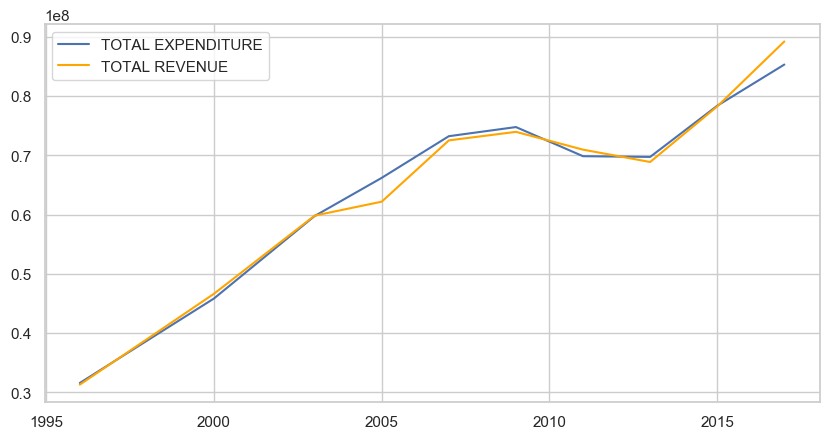

In [78]:
plt.figure(figsize=(10,5))
x=edu2[edu2['STATE']=='CALIFORNIA']['YEAR']
y=edu2[edu2['STATE']=='CALIFORNIA']['TOTAL_EXPENDITURE']
plt.plot(x,y,label='TOTAL EXPENDITURE')

plt.plot(edu2[edu2['STATE']=='CALIFORNIA']['YEAR'],edu2[edu2['STATE']=='CALIFORNIA']['TOTAL_REVENUE'],
         label='TOTAL REVENUE',color='orange')
plt.legend()
plt.show()

### SORU3

In [80]:
edu2['ortfark_4']=edu2.AVG_READING_4_SCORE-edu2.AVG_MATH_4_SCORE
edu2['ortfark_8']=edu2.AVG_READING_8_SCORE-edu2.AVG_MATH_8_SCORE

In [130]:
print('READ-MATH fark 4')
print(edu2.loc[edu2.STATE=='CALIFORNIA']['AVG_READING_4_SCORE']-edu2.loc[edu2.STATE=='CALIFORNIA']['AVG_MATH_4_SCORE'])

READ-MATH fark 4
208     -7.216
412     -7.649
565    -21.823
667    -23.855
769    -21.512
874    -21.913
978    -22.806
1080   -21.108
1182   -18.871
1445   -16.841
dtype: float64


In [138]:
print('READ-MATH fark 8')
print(edu2.loc[edu2.STATE=='CALIFORNIA']['AVG_READING_8_SCORE']-edu2.loc[edu2.STATE=='CALIFORNIA']['AVG_MATH_8_SCORE'])

READ-MATH fark 8
208      6.425
412      2.323
565    -11.976
667     -4.374
769     -2.222
874    -15.553
978    -11.485
1080   -15.453
1182   -16.556
1445   -14.118
dtype: float64


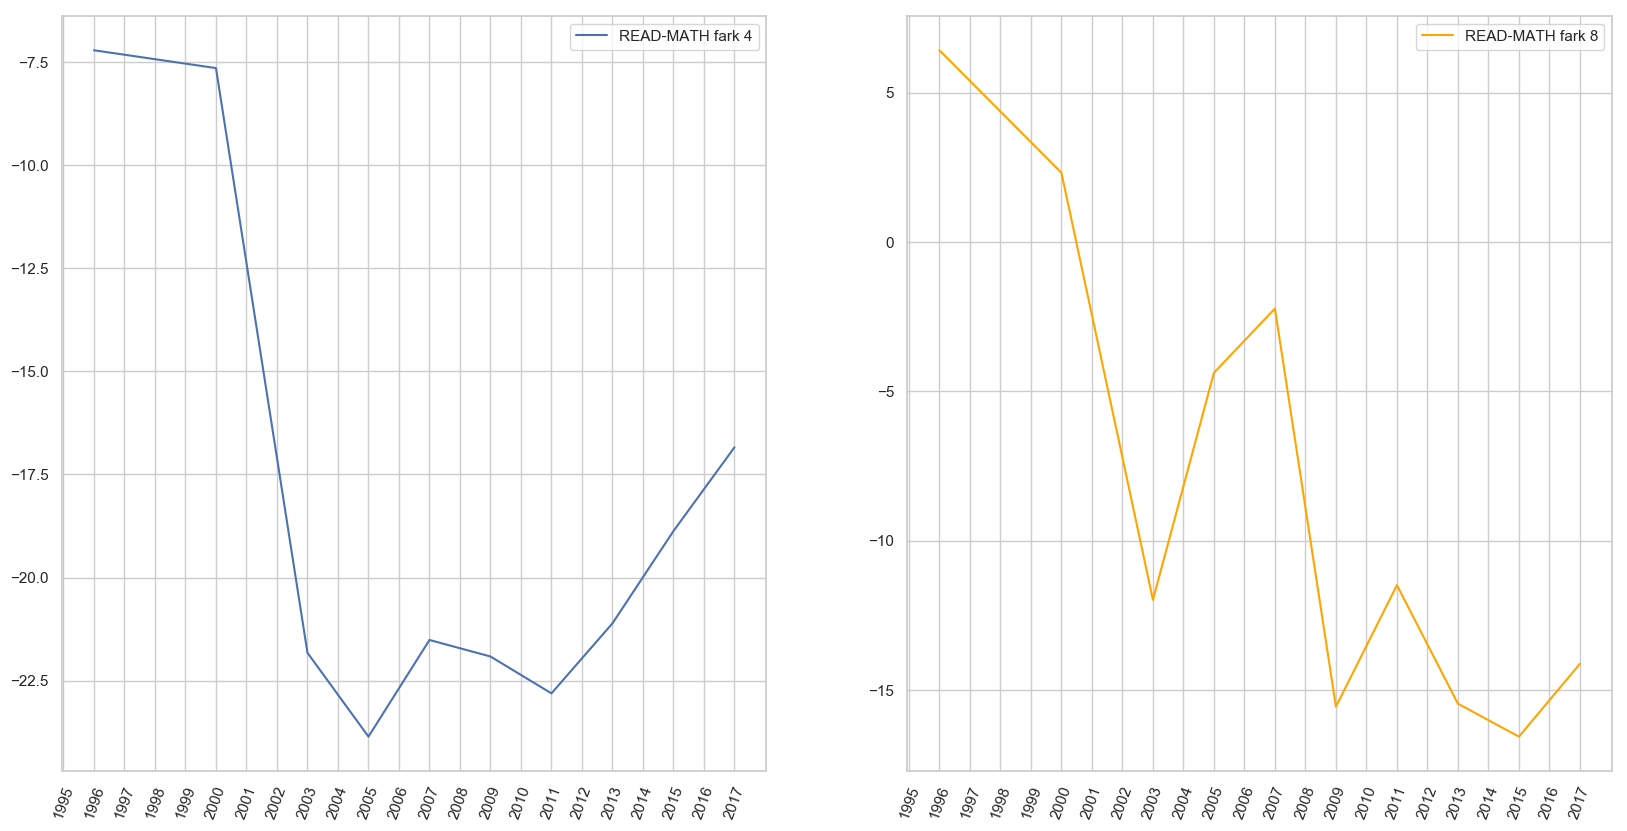

In [137]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
x = edu2.loc[edu2.STATE == "CALIFORNIA"]['YEAR']
y = edu2.loc[edu2.STATE == "CALIFORNIA"]['ortfark_4']
plt.plot(x,y,label='READ-MATH fark 4')
plt.xticks(range(1995,2018),rotation=70)
plt.legend()
plt.subplot(1,2,2)
plt.plot(edu2.loc[edu2.STATE=='CALIFORNIA']['YEAR'],
         edu2.loc[edu2.STATE=='CALIFORNIA']['ortfark_8'],
         label='READ-MATH fark 8',color='orange')
plt.xticks(range(1995,2018),rotation=70)
plt.legend()
plt.show()

CALIFORNIA`da  matamatik notları okuma notlarına göre daha iyidir. 

### SORU 4

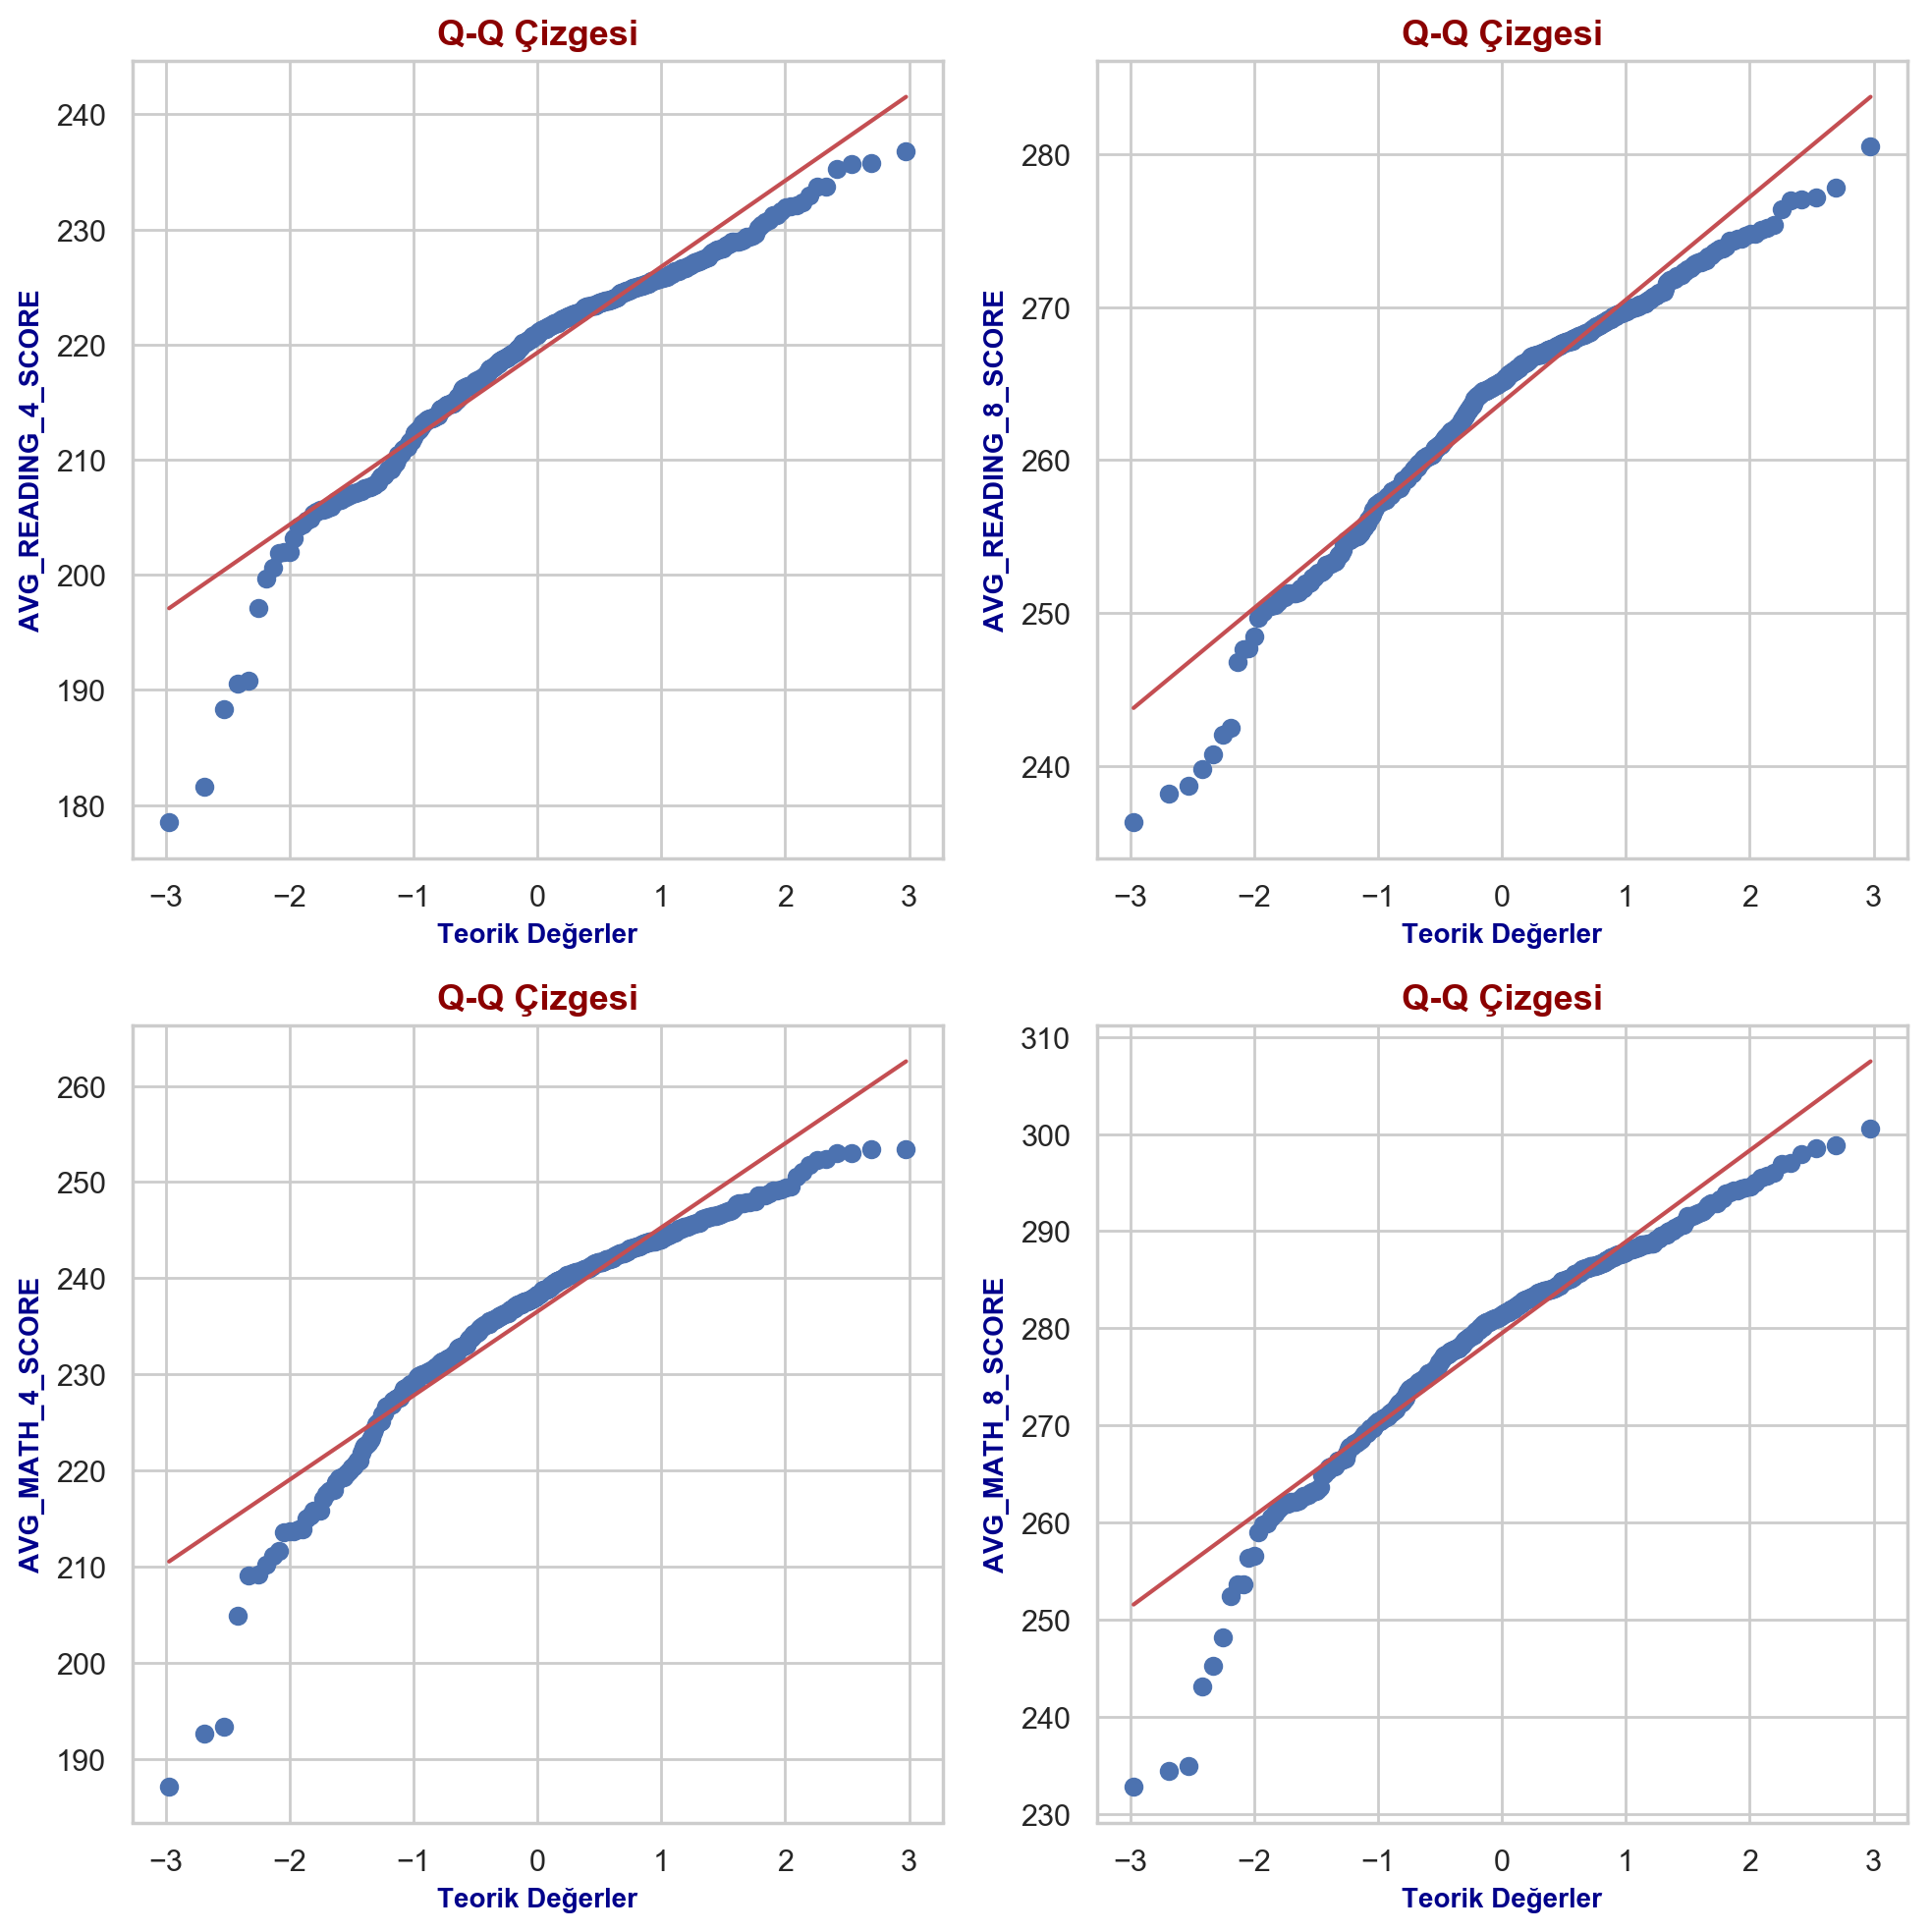

In [162]:
plt.figure(figsize=(10,10),dpi=200)
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
degiskenler = ['AVG_READING_4_SCORE','AVG_READING_8_SCORE','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE']
for i in range(4):
    plt.subplot(2,2,i+1)
    q=stats.probplot(edu2[degiskenler[i]],plot=plt)
    plt.title("Q-Q Çizgesi", fontdict = baslik_font)
    plt.xlabel("Teorik Değerler", fontdict = eksen_font)
    plt.ylabel(degiskenler[i], fontdict = eksen_font)
    
plt.tight_layout()

Scorelar normal dagilima uymamaktadir. Hem okuma hem matematik icin ortalama medyandan buyuktur.Grafik sola carpiktir.

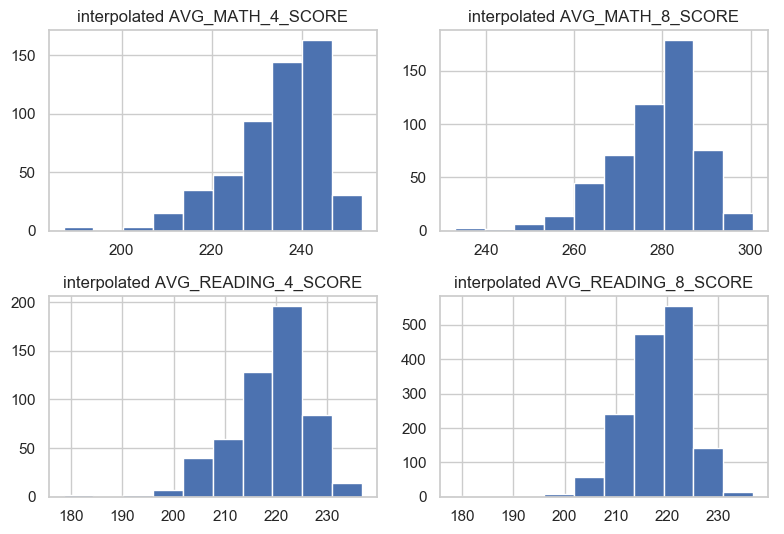

In [183]:
score=["AVG_MATH_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_4_SCORE","AVG_READING_8_SCORE"]
edu3=edu.copy()
for scr in score:
    edu3[sc]=edu3[scr].interpolate(limit_direction = 'both')
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.hist(edu3[score[i]])
    plt.title('interpolated {}'.format(score[i]))
    plt.tight_layout()
    

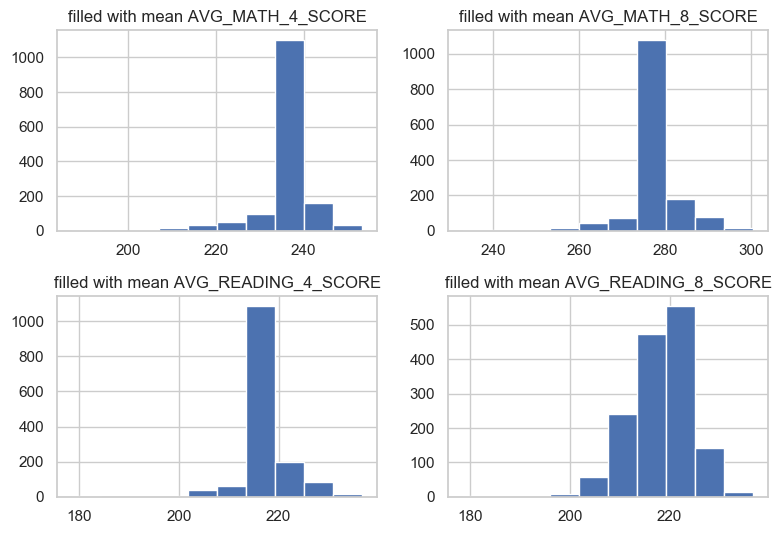

In [188]:
for scr in score:
    edu3[scr]=edu3[scr].fillna(edu3[scr].mean())
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.hist(edu3[score[i]])
    plt.title('filled with mean {}'.format(score[i]))
    plt.tight_layout()

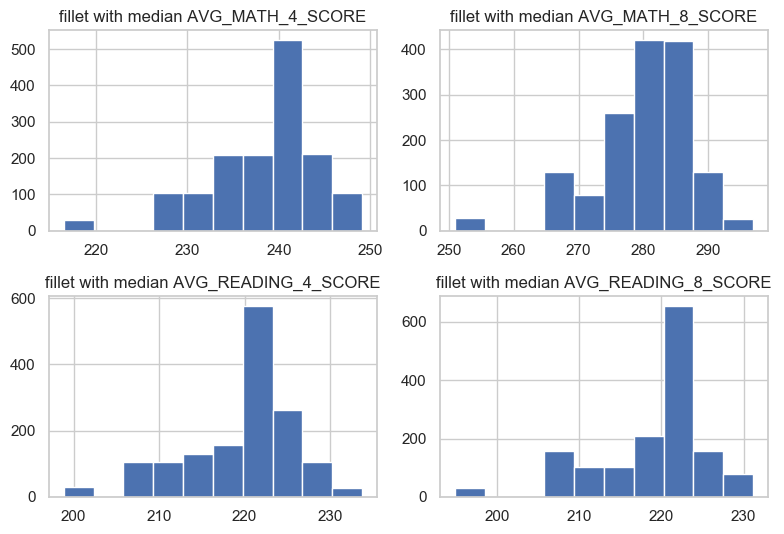

In [180]:
for scr in score:
    edu3[scr]=edu3[scr].fillna(edu3[scr].median())
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.hist(edu3[score[i]])
    plt.title('fillet with median {}'.format(score[i]))
    plt.tight_layout()

Eksik yerlerin doldurulması büyük ölçüde dağılımı etkiler. Mean ve ya median ile doldurduğumuzda güçlü bir etkisi olmaktadır. Bu da verilerimizde çok fazla eksik olmasından kaynaklanmaktadır.
Dağılımdaki değişim, sonuçları önemli oranda etkileyebilir. Bu yüzden eksik kısımları ya enterpolasyon ile doldurmalıyız ve ya eksik kısımları atmalıyız.